In [58]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(5)

In [48]:
df = pd.read_csv("../data/train_embedded_bert.csv")
df["sentence_embedding"] = df["sentence_embedding"].apply(lambda x : np.array([float(value) for value in x[1:-1].split(",")]))

In [51]:
X = np.zeros(shape = (len(df),768))
for i in range(len(df)) :
    X[i] = df["sentence_embedding"].values[i]

In [52]:
X.shape

(12120, 768)

In [69]:
pca = decomposition.PCA(n_components=2)
pc = pca.fit_transform(X)

In [70]:
df["PC1"] = pc[:,0]
df["PC2"] = pc[:,1]

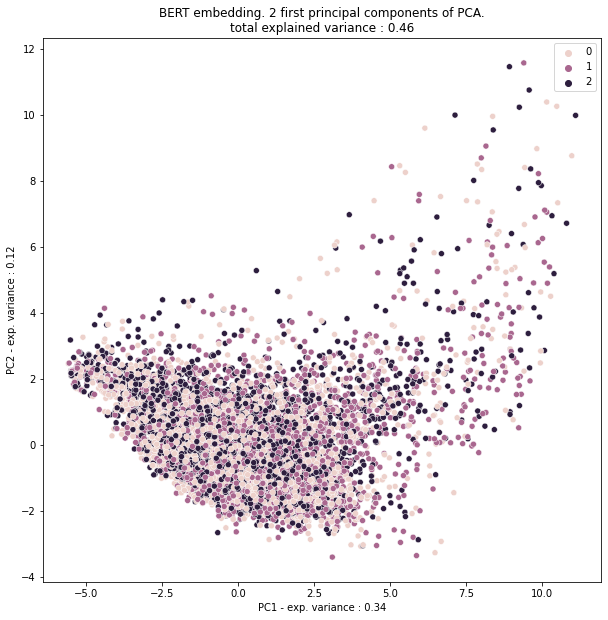

In [79]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="label")
plt.title("BERT embedding. 2 first principal components of PCA.\ntotal explained variance : {}".format(np.round(pca.explained_variance_ratio_.sum(),2)))
plt.xlabel("PC1 - exp. variance : {}".format(np.round(pca.explained_variance_ratio_[0],2)))
plt.ylabel("PC2 - exp. variance : {}".format(np.round(pca.explained_variance_ratio_[1],2)))
plt.legend()
plt.savefig("../data/PCA_BERT_embedding.jpg")
plt.show()

array([0.33804901, 0.11763629])